## Discrete-Time, Contractual Setting Retention Model

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from scipy.optimize import minimize

### Introduction

The models discussed here are applicable for the following two-dimensional classification of customer base: 

1) **Opportunities for transactions: Discrete-Time**
   - By “discrete-time,” we mean that transactions can occur only at fixed points in time (e.g., the annual renewal cycles for most professional organizations). This is in contrast to continuous-time, where the transactions can occur at any point in time (e.g., the cancelation of basic utility contracts).
2) **Type of relationship with customers: Contractual**
   - In a “contractual” setting, the time at which the customer becomes inactive is observed (e.g., when the customer fails to renew a subscription). This is in contrast to a “noncontractual” setting, where the absence of a contract or subscription means that the point in time at which the customer becomes inactive is not observed by the firm (e.g., a catalog retailer). The challenge is how to differentiate between a customer who has ended a “relationship” with the firm versus one who is merely in the midst of a long hiatus between transactions.

Consider a company with a subscription-based business model. 1000 customers are acquired at the beginning of Year 1 with the following renewal patterns:
| ID   | Year 1 | Year 2 | Year 3 | Year 5 | Year 5 |
| ---- | ------ | ------ | ------ | ------ | ------ |
| 1    | 1      | 1      | 0      | 0      | 0      |
| 2    | 1      | 0      | 0      | 0      | 0      |
| 3    | 1      | 1      | 1      | 0      | 0      |
| 4    | 1      | 1      | 0      | 0      | 0      |
| 5    | 1      | 1      | 1      | 1      | 1      |
| .    | .      | .      | .      | .      | .      |
| .    | .      | .      | .      | .      | .      |
| .    | .      | .      | .      | .      | .      |
| 998  | 1      | 0      | 0      | 0      | 0      |
| 999  | 1      | 1      | 1      | 0      | 0      |
| 1000 | 1      | 0      | 0      | 0      | 0      |
|      | **1000**   | **631**    | **468**    | **382**    | **326**    |

**Motivating Problem**
- How many customers will “survive” to Year 6, 7, . . . , 13? 
- What will the retention rates for this cohort look like for the next 8 years?

<div>
<img src="references/timeline.png" width="600"/>
</div>

The **survivor function** $S(t)$ is the proportion of the cohort that continue as a customer beyond $t$.
$$S(0) = ?$$
$$S(1) = ?$$
$$S(2) = ?$$

The **retention rate** is the ratio of customers retained to the number at risk.
$$r(1) = ?$$
$$r(2) = ?$$

For survivor function $S(t)$
$$r(t) = \frac{S(t)}{S(t − 1)}$$

**Modeling Objective**: We want to derive a mathematical expression for $S(t)$, which can then be used to generate the desired forecasts.

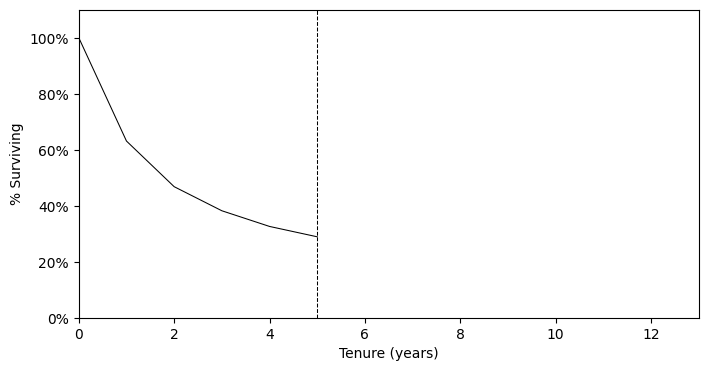

In [2]:
year, alive = np.loadtxt('data/hardie-sample-retention.csv', dtype='object', delimiter=',', unpack=True, skiprows=1) 
year = year.astype(int)
alive = alive.astype(float)

train_marker_x = [5 for _ in np.arange(0,1.2,0.1)]
train_marker_y = [_ for _ in np.arange(0,1.2,0.1)]

surviving = alive / alive[0]

plt.figure(figsize=(8,4), dpi=100)
plt.plot(surviving[:6], "k-", linewidth=0.75)
plt.plot(train_marker_x, train_marker_y, "k--", linewidth=0.75)
plt.xlabel("Tenure (years)")
plt.ylabel("% Surviving")
plt.ylim(0,1.1)
plt.xlim(0, 13)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

#### Parametric Approach: Projecting Survival Using Simple Functions of Time - Linear Regression

The simplest and most intuitive approach to modeling customer retention to try to fit some known function to the retention curve. This approach is called **parametric statistics**, because a few parameters describe the shape of the function. The power of this approach is that we can use it to estimate what happens in the future. Using a single cohort data of active customers from acquisition to the end of an observed period we can compute a best-fit curve that minimizes the sum of squared errors. 

A **parametric approach** to modeling retention curves means selecting a specific functional form (or model) with a small number of parameters that can capture the retention dynamics over time. The functional form can be linear, quadratic, or exponential. By tuning the function's parameters, we aim to approximate the behavior of actual customer retention data. In the implementations below, the parameters are optimized to match the predicted retention curve with the observed data.

1) Linear Function Form: $R(t) = \beta_{0} + \beta_{1}t$
2) Quadratic Function Form: $R(t) = \beta_{0} + \beta_{1}t + \beta_{2}t^{2}$
3) Exponential Function Form: $R_{t} = e^{\beta_{0}+\beta_{1}t}$

In [3]:
import statsmodels.api as sm
import warnings
warnings.simplefilter('ignore', category=UserWarning)

y = surviving[:5]

# Linear Function Regression
x = sm.add_constant(year[:5])   
linear_results = sm.OLS(y, x).fit()
print(linear_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     19.88
Date:                Wed, 13 Nov 2024   Prob (F-statistic):             0.0210
Time:                        12:02:56   Log-Likelihood:                 5.0720
No. Observations:                   5   AIC:                            -6.144
Df Residuals:                       3   BIC:                            -6.925
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8808      0.088     10.038      0.0

In [4]:
# Quadratic Function Regression
x = np.column_stack((year[:5], year[:5]**2))
x = sm.add_constant(x)
quadratic_results = sm.OLS(y, x).fit()
print(quadratic_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     90.91
Date:                Wed, 13 Nov 2024   Prob (F-statistic):             0.0109
Time:                        12:02:56   Log-Likelihood:                 11.295
No. Observations:                   5   AIC:                            -16.59
Df Residuals:                       2   BIC:                            -17.76
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9812      0.038     26.091      0.0

In [5]:
# Exponential Function Regression
x = year[:5]
x = sm.add_constant(x)
exponential_results = sm.OLS(np.log(surviving[:5]), x).fit()
print(exponential_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     62.14
Date:                Wed, 13 Nov 2024   Prob (F-statistic):            0.00425
Time:                        12:02:56   Log-Likelihood:                 5.2161
No. Observations:                   5   AIC:                            -6.432
Df Residuals:                       3   BIC:                            -7.213
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1119      0.085     -1.312      0.2

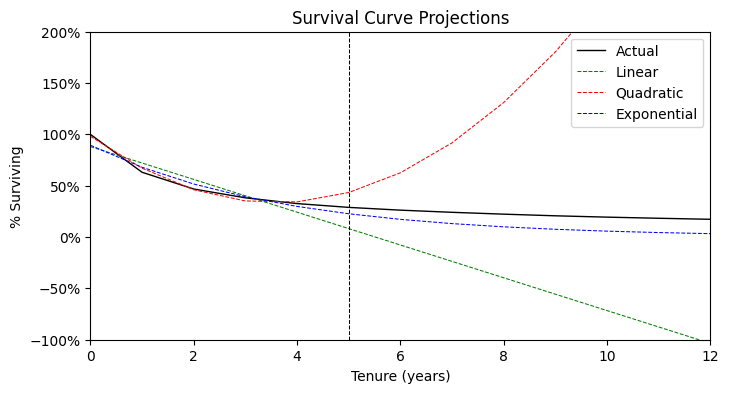

In [6]:
intercept, t_coeff = linear_results.params
y_lin = intercept + (t_coeff * year)
intercept, t_coeff, tsquare = quadratic_results.params
y_quad = intercept + t_coeff*year + tsquare*year**2
intercept, t_coeff = exponential_results.params
y_exp = np.exp(intercept + t_coeff*year)

train_marker_x = [5 for _ in np.arange(-1,2.1,0.1)]
train_marker_y = [_ for _ in np.arange(-1,2.1,0.1)]

surviving = alive / alive[0]

plt.figure(figsize=(8,4), dpi=100)
plt.title("Survival Curve Projections")
plt.plot(year, surviving, "k-", linewidth=1, label="Actual")
plt.plot(year, y_lin, "g--", linewidth=0.75, label="Linear")
plt.plot(year, y_quad, "r--", linewidth=0.75, label="Quadratic")
plt.plot(year, y_exp, "b--", linewidth=0.75, label="Exponential")
plt.plot(train_marker_x, train_marker_y, "k--", linewidth=0.75)
plt.xlabel("Tenure (years)")
plt.ylabel("% Surviving")
plt.ylim(-1,2)
plt.xlim(0, 12)
plt.legend()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

The fit of all three models up to and including Year 4 is reasonable, and the quadratic model provides a particularly good fit (R-Squared = 0.989). But when we consider the projections beyond the model calibration period, all three models break down dramatically. The linear and exponential models underestimate Year 12 survival while the quadratic model overestimates Year 12 survival. Furthermore, the models lack logical consistency: The linear model would have $S(t) < 0$ after year 6, and according to the quadratic model the survivor function will start to increase over time, which is not possible. 

Of course, we could try out different arbitrary functions of time, but this would be a pure curve-fitting exercise at its worst. Furthermore, it is hard to imagine that there would be any underlying rationale for the equation(s) that we might settle upon.

### Shifted Geometric (SG) Model

In the three distinct implementation examples we look at:
- The first uses $x$ as a parameter, which represents a **monthly retention** which is obtained by minimizing the sum of squared errors between actual and predicted churn at each period and the number of survivors at the end of the period.
  - Models retention as a deterministic process of expected losses.
- The second uses $\theta$ as a parameter, which represents a **monthly churn probability** which is obtained by minimizing the sum of squared errors between actual and predicted retention at each period.
  - Focuses on fitting the retention rate proportionally.
- The third also uses $\theta$ as a parameter, which represents a **monthly churn probability** but is designed to maximize the log-likelihood function which represents the sum of the product of actual and log of the predicted churn and actual and log of the predicted survivors at the end of the period.
  - Assumes churn follows a probabilistic distribution, maximizing the likelihood of observed churn and survival.

These three implementations model customer retention using a shifted geometric approach. While each one approaches the calculation of retention and churn differently, they share the common goal of finding a parameter (`theta` or `x`) that best fits the data to a retention curve. Here’s a breakdown of their similarities and differences:

General overview of the three general methods implemented:

1. **Goal**: All three implementations aim to estimate a retention rate that minimizes the discrepancy between the model's prediction and the observed retention data. This is achieved through different error functions or likelihood calculations.
2. **Optimization**: All use `scipy.optimize.minimize` to find the optimal value for `theta` (or `x`), which represents the retention or churn parameter.
3. **Retention Model**: They each use a variation of a geometric retention model, where the probability of customers staying decreases over time at a certain rate.

**Implementation 1**: Sum of Squared Errors Using Expected Losses and Survivors

- **Objective**: This model minimizes the sum of squared errors (SSE) by comparing the *expected customer loss per month and the actual observed loss*. It also considers the *difference between expected and actual survivors at the end of the period*.
- **Expected Retention Calculation**: It calculates the expected retention each month based on `x`, then uses it to find the probability of churn (`p_churn`) and expected monthly losses (`en_loss`).
- **Error Calculation**: Combines the squared error for both customer loss and survivors to get an overall error.

**Implementation 2**: Direct Retention Comparison Using Monthly Retention Proportion

- **Objective**: This model also minimizes SSE but does so by directly comparing the retention rate over time with the model’s expected retention (`(1 - theta) ** month`).
- **Retention Calculation**: it calculate the actual retention rate, then calculates the model’s expected retention with the geometric formula. 
- **Error Calculation**: The function minimizes the SSE between the observed retention and the predicted retention directly.

**Implementation 3**: Log-Likelihood Maximization Using Probabilistic Churn

- **Objective**: Instead of minimizing SSE, this function *maximizes the log-likelihood function* for the observed retention data as a means of estimating model parameters. This approach is more appropriate for use in a probabilistic model.
- **Churn Probability Calculation**: It calculates the probability of churn each month with a probabilistic model based on `theta`, which is the monthly churn rate.
- **Likelihood Components**: Calculates log-likelihood in two parts: 
  - **Churn**: The likelihood of observing the actual number of customers lost each period.
  - **Survivors**: The likelihood of the remaining customers staying until the end.
- **Error Calculation**: Returns the negative log-likelihood, which is minimized to find the best-fit `theta`.

These methods all aim to fit a shifted geometric retention curve but through different interpretations and optimization approaches, offering alternative ways to capture customer retention dynamics.

#### 1 Customer Segment - Geometric Curve Fitting with Retention Rate Parameter

In [7]:
month, alive = np.loadtxt('data/retention-example.csv', dtype='object', delimiter=',', unpack=True, skiprows=1) 
month = month.astype(int)
alive = alive.astype(float)

In [8]:
# Observed retention curve
retention = alive/alive[0]
# Monthly loss
loss = alive[:-1] - alive[1:]

In [9]:
def square_error(x):
    e_retention = np.ones_like(retention) * (x**month) # Expected monthly retention 
    p_churn = e_retention[:-1] - e_retention[1:] # Probability of monthly churn 
    en_loss = p_churn * alive[0] # Expected number of losses / month
    loss_error = np.sum((en_loss - loss)**2) # Sum of square of error - expected and actual loss
    survivor_error = ((e_retention[-1] * alive[0]) - alive[-1])**2 # Sum of square of error - expected and actual survivors at the end of the period
    return loss_error + survivor_error

x_guess = 0.94
res = minimize(square_error, x_guess)
print('Predicted Monthly Retention Rate =', f'{res.x[0]:0.2%}')
print('Sum of Squared Errors =', f'{res.fun:0.0f}')

Predicted Monthly Retention Rate = 94.84%
Sum of Squared Errors = 272850400


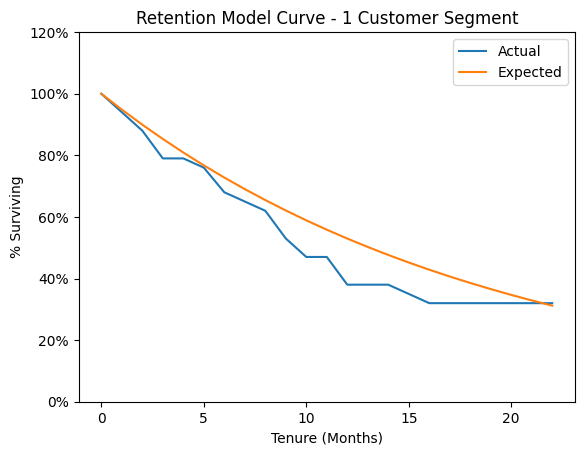

In [10]:
plt.plot(month, retention, label="Actual")
plt.plot(month, np.ones_like(retention) * (res.x**month), label="Expected")
plt.title('Retention Model Curve - 1 Customer Segment')
plt.xlabel("Tenure (Months)")
plt.ylabel("% Surviving")
plt.ylim((0,1.2))
plt.legend()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

#### 2 Customer Segments - Geometric Curve Fitting with Retention Rate & Segment Proportion Parameters

In [11]:
# Observed retention curve
retention = alive/alive[0]
# Monthly loss
loss = alive[:-1] - alive[1:]

In [12]:
def square_error(x):
    e_retention = (np.ones_like(retention) * (x[0]**month) * x[2]) + \
                  (np.ones_like(retention) * (x[1]**month) * (1 - x[2]))
    e_churn = e_retention[:-1] - e_retention[1:] 
    en_loss = e_churn * alive[0] 
    loss_error = np.sum((en_loss - loss)**2) 
    survivor_error = ((e_retention[-1] * alive[0]) - alive[-1])**2
    return loss_error + survivor_error

# 3 Decision Variables: Retention rate for segment 1 & 2 and proportion of segment 1 customers
guesses = 0.95, 0.90, 0.20
bnds = ((0, 1), (0, 1), (0, 1))
res = minimize(square_error, x0=guesses, bounds=bnds) 
print('Monthly Retention Rate - Segment 1 =', f'{res.x[0]:0.2%}')
print('% of Customer - Segment 1 =', f'{res.x[2]:0.2%}')
print('Monthly Retention Rate - Segment 2 =', f'{res.x[1]:0.2%}')
print('% of Customer - Segment 2 =', f'{1 - res.x[2]:0.2%}')
print('Sum of Squared Errors =', f'{res.fun:0.0f}')

res

Monthly Retention Rate - Segment 1 = 100.00%
% of Customer - Segment 1 = 21.00%
Monthly Retention Rate - Segment 2 = 91.39%
% of Customer - Segment 2 = 79.00%
Sum of Squared Errors = 252951531


  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 252951531.1289717
        x: [ 1.000e+00  9.139e-01  2.100e-01]
      nit: 20
      jac: [-1.521e+08 -2.224e+04 -6.858e+03]
     nfev: 104
     njev: 26
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>

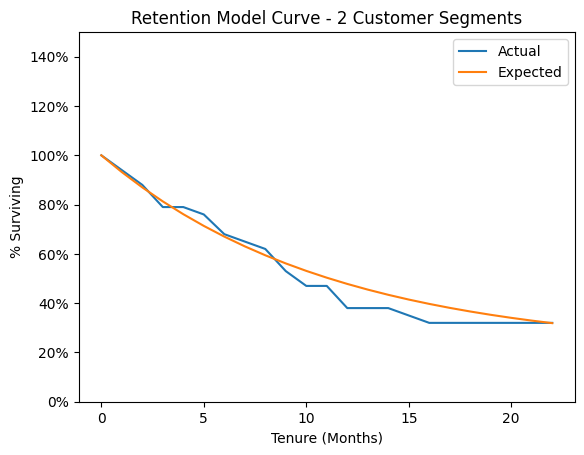

In [13]:
e_retention = (np.ones_like(retention) * (res.x[0]**month) * res.x[2]) + \
                (np.ones_like(retention) * (res.x[1]**month) * (1 - res.x[2]))
                
plt.plot(month, retention, label="Actual")
plt.plot(month, e_retention, label="Expected")
plt.title('Retention Model Curve - 2 Customer Segments')
plt.xlabel("Tenure (Months)")
plt.ylabel("% Surviving")
plt.ylim((0,1.5))
plt.legend()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

#### 3 Customer Segments - Geometric Curve Fitting with Retention Rate & Segment Proportion Parameters

In [14]:
# Observed retention curve
retention = alive/alive[0]
# Monthly loss
loss = alive[:-1] - alive[1:]

In [15]:
from scipy.optimize import LinearConstraint

def square_error(x):
    e_retention = (np.ones_like(retention) * (x[0]**month) * x[3]) + \
                  (np.ones_like(retention) * (x[1]**month) * x[4]) + \
                  (np.ones_like(retention) * (x[2]**month) * x[5])
    e_churn = e_retention[:-1] - e_retention[1:] 
    en_loss = e_churn * alive[0] 
    loss_error = np.sum((en_loss - loss)**2) 
    survivor_error = ((e_retention[-1] * alive[0]) - alive[-1])**2
    return loss_error + survivor_error

guesses = np.array([0.90, 0.90, 0.90, 0.20, 0.30, 0.50])
bnds = np.array([(0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1)])
cons = LinearConstraint([0, 0, 0, 1, 1, 1], 1, 1) # Define the constraint: x[3] + x[4] + x[5] == 1
res = minimize(square_error, x0=guesses, bounds=bnds, constraints=[cons], method='trust-constr') 
print('Monthly Retention Rate - Segment 1 =', f'{res.x[0]:0.2%}')
print('% of Customer - Segment 1 =', f'{res.x[3]:0.2%}')
print('Monthly Retention Rate - Segment 2 =', f'{res.x[1]:0.2%}')
print('% of Customer - Segment 2 =', f'{res.x[4]:0.2%}')
print('Monthly Retention Rate - Segment 3 =', f'{res.x[2]:0.2%}')
print('% of Customer - Segment 3 =', f'{res.x[5]:0.2%}')
print('Sum of Squared Errors =', f'{res.fun:0.0f}')

Monthly Retention Rate - Segment 1 = 91.39%
% of Customer - Segment 1 = 37.10%
Monthly Retention Rate - Segment 2 = 100.00%
% of Customer - Segment 2 = 21.00%
Monthly Retention Rate - Segment 3 = 91.39%
% of Customer - Segment 3 = 41.89%
Sum of Squared Errors = 252951531


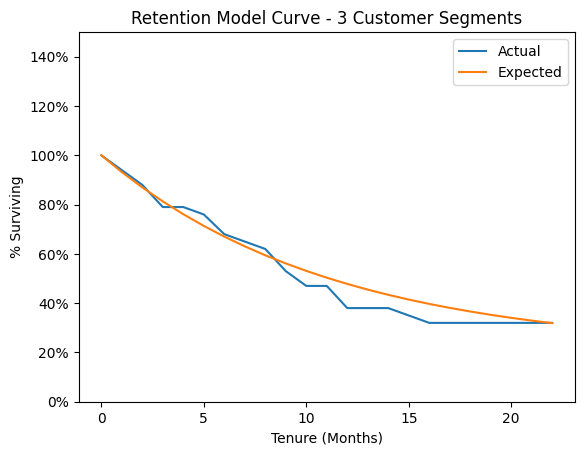

In [16]:
e_retention = (np.ones_like(retention) * (res.x[0]**month) * res.x[3]) + \
              (np.ones_like(retention) * (res.x[1]**month) * res.x[4]) + \
              (np.ones_like(retention) * (res.x[2]**month) * res.x[5])
                
plt.plot(month, retention, label="Actual")
plt.plot(month, e_retention, label="Expected")
plt.title('Retention Model Curve - 3 Customer Segments')
plt.xlabel("Tenure (Months)")
plt.ylabel("% Surviving")
plt.ylim((0,1.5))
plt.legend()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

In [17]:
from scipy.optimize import LinearConstraint

def square_error(x):
    e_retention = (np.ones_like(retention) * (x[0]**month) * x[3]) + \
                  (np.ones_like(retention) * (x[1]**month) * x[4]) + \
                  (np.ones_like(retention) * (x[2]**month) * (1-x[4]-x[3]))
    e_churn = e_retention[:-1] - e_retention[1:] 
    en_loss = e_churn * alive[0] 
    loss_error = np.sum((en_loss - loss)**2) 
    survivor_error = ((e_retention[-1] * alive[0]) - alive[-1])**2
    return loss_error + survivor_error

guesses = np.array([0.90, 0.90, 0.90, 0.20, 0.30])
bnds = np.array([(0, 1), (0, 1), (0, 1), (0, 1), (0, 1)])
cons = LinearConstraint([0, 0, 0, 1, 1], 1, 1)
res = minimize(square_error, x0=guesses, bounds=bnds, constraints=[cons], method='COBYQA') 
print('Monthly Retention Rate - Segment 1 =', f'{res.x[0]:0.2%}')
print('% of Customer - Segment 1 =', f'{res.x[3]:0.2%}')
print('Monthly Retention Rate - Segment 2 =', f'{res.x[1]:0.2%}')
print('% of Customer - Segment 2 =', f'{res.x[4]:0.2%}')
print('Monthly Retention Rate - Segment 3 =', f'{res.x[2]:0.2%}')
print('% of Customer - Segment 3 =', f'{1-res.x[4]-res.x[3]:0.2%}')
print('Sum of Squared Errors =', f'{res.fun:0.0f}')

Monthly Retention Rate - Segment 1 = 100.00%
% of Customer - Segment 1 = 21.00%
Monthly Retention Rate - Segment 2 = 91.39%
% of Customer - Segment 2 = 79.00%
Monthly Retention Rate - Segment 3 = 48.15%
% of Customer - Segment 3 = 0.00%
Sum of Squared Errors = 252951531


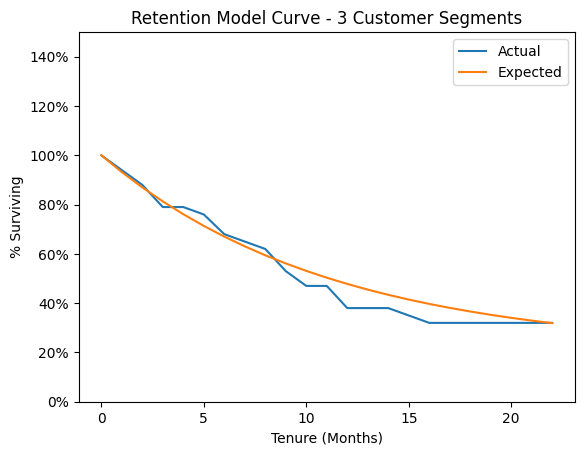

In [18]:
e_retention = (np.ones_like(retention) * (res.x[0]**month) * res.x[3]) + \
              (np.ones_like(retention) * (res.x[1]**month) * res.x[4]) + \
              (np.ones_like(retention) * (res.x[2]**month) * (1-res.x[4]-res.x[3]))
                
plt.plot(month, retention, label="Actual")
plt.plot(month, e_retention, label="Expected")
plt.title('Retention Model Curve - 3 Customer Segments')
plt.xlabel("Tenure (Months)")
plt.ylabel("% Surviving")
plt.ylim((0,1.5))
plt.legend()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

#### 1 Customer Segment - Exponential Curve Fitting with Churn Parameter

In [19]:
month, alive = np.loadtxt('data/DSC-retention-data.csv', dtype='object', delimiter=',', unpack=True, skiprows=1) 
month = month.astype(int)
alive = alive.astype(float)

train_month = month[:8]
train_alive = alive[:8]

In [20]:
def square_error(theta):
    retention = train_alive / train_alive[0]
    e_retention = (1-theta)**train_month
    return np.sum((retention-e_retention)**2)

theta_guess = 0.5
res = minimize(square_error, theta_guess, bounds=[(0.000001,0.999999)])
theta = res.x[0]
print(f'{theta = :.1%}')
print(f'retention rate = {1-theta:.1%}')
print(f'SSE = {res.fun:.3%}')

theta = 11.2%
retention rate = 88.8%
SSE = 0.929%


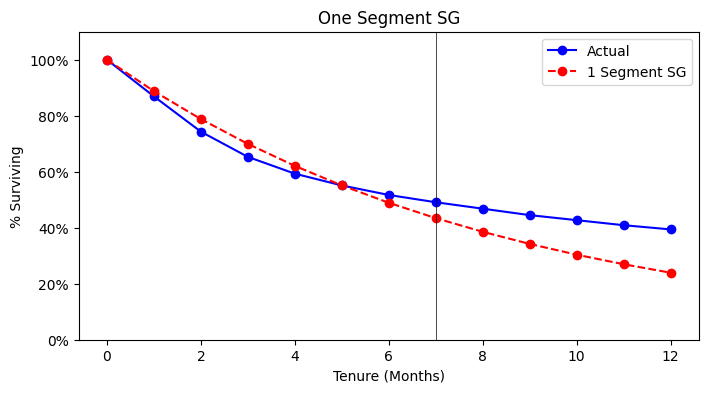

In [21]:
train_marker_x = [7 for _ in np.arange(0,1.2,0.1)]
train_marker_y = [_ for _ in np.arange(0,1.2,0.1)]

retention = alive / alive[0]
e_retention = (1-theta)**month

plt.figure(figsize=(8,4), dpi=100)
plt.plot(retention, "b-o", label='Actual')
plt.plot(e_retention, "r--o", label='1 Segment SG')
plt.plot(train_marker_x, train_marker_y, "k-", linewidth=0.5)
plt.title('One Segment SG')
plt.xlabel("Tenure (Months)")
plt.ylabel("% Surviving")
plt.ylim(0,1.1)
plt.legend()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

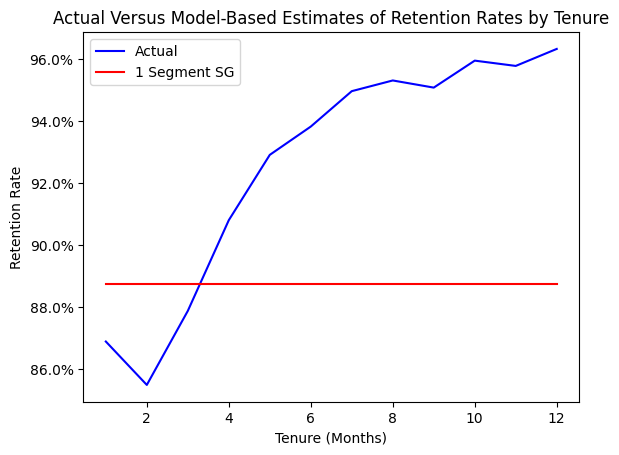

In [22]:
rr = alive[1:] / alive[:-1]
e_alive = alive[0] * e_retention
e_rr = e_alive[1:] / e_alive[:-1]

plt.title("Actual Versus Model-Based Estimates of Retention Rates by Tenure")
plt.plot(month[1:], rr, "b", label='Actual')
plt.plot(month[1:], e_rr, "r", label='1 Segment SG')
plt.xlabel("Tenure (Months)")
plt.ylabel("Retention Rate")
plt.legend()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

#### 2 Customer Segments - Exponential Curve Fitting with Churn & Segment Proportion Parameter

In [23]:
def square_error(x):
    retention = train_alive / train_alive[0]
    s1_retention = (1-x[1])**train_month
    s2_retention = (1-x[2])**train_month
    e_retention = s1_retention*x[0] + s2_retention*(1-x[0])
    return np.sum((retention-e_retention)**2)

guesses = [0.2, 0.1, 0.1]
bnd = [(0,1), (0,1), (0,1)]
res = minimize(square_error, guesses, bounds=bnd)

pi1, theta1, theta2 = res.x
print(f'{pi1 = :.1%}, {theta1 = :.1%}, rr = {1-theta1:.1%}\npi2 = {1-pi1:.1%}, {theta2 = :.1%}, rr = {1-theta2:.1%}')
print(f'SSE = {res.fun:.3%}')

pi1 = 40.6%, theta1 = 0.0%, rr = 100.0%
pi2 = 59.4%, theta2 = 24.6%, rr = 75.4%
SSE = 0.032%


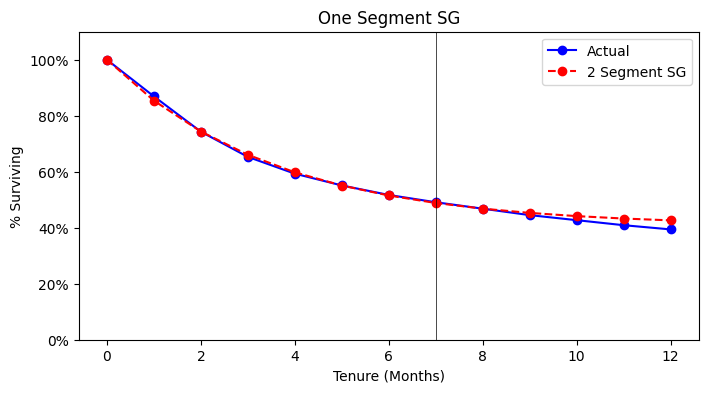

In [24]:
train_marker_x = [7 for _ in np.arange(0,1.2,0.1)]
train_marker_y = [_ for _ in np.arange(0,1.2,0.1)]

retention = alive / alive[0]
s1_retention = (1-theta1)**month
s2_retention = (1-theta2)**month
e_retention = s1_retention*pi1 + s2_retention*(1-pi1)

plt.figure(figsize=(8,4), dpi=100)
plt.plot(retention, "b-o", label='Actual')
plt.plot(e_retention, "r--o", label='2 Segment SG')
plt.plot(train_marker_x, train_marker_y, "k-", linewidth=0.5)
plt.title('One Segment SG')
plt.xlabel("Tenure (Months)")
plt.ylabel("% Surviving")
plt.ylim(0,1.1)
plt.legend()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

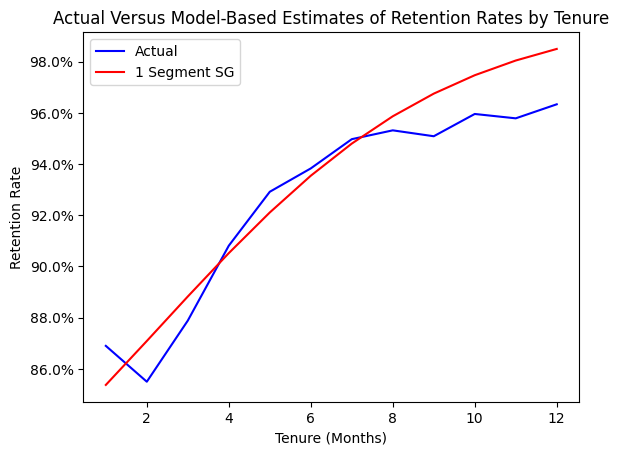

In [25]:
rr = alive[1:] / alive[:-1]
e_alive = alive[0] * e_retention
e_rr = e_alive[1:] / e_alive[:-1]

plt.title("Actual Versus Model-Based Estimates of Retention Rates by Tenure")
plt.plot(month[1:], rr, "b", label='Actual')
plt.plot(month[1:], e_rr, "r", label='1 Segment SG')
plt.xlabel("Tenure (Months)")
plt.ylabel("Retention Rate")
plt.legend()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

#### Problem with Homogeneity or Discrete Heterogeneity

So far, our geometric model has assumed either a homogenous customer base (1 customer segment) or 2 to 3 customers segments. Higher segments have performed better but the solutions are less parsimonious. Computing solutions of greater segments becomes particularly difficult to handle given that parameters increase by a factor of 2, requiring a solution for the probability of churn or survival and the associated probability of belonging to a particular segment (weight). Computing, for example, 10 customer segments can be computationally intensive. 

While assuming 1 to 3 customers segments for a shifted geometric model may provide a reasonably good fit on the calibration data, the projections beyond the model calibration period can underestimating or overestimate percentage survival. The possible range of error may not be acceptable in some commercial settings.

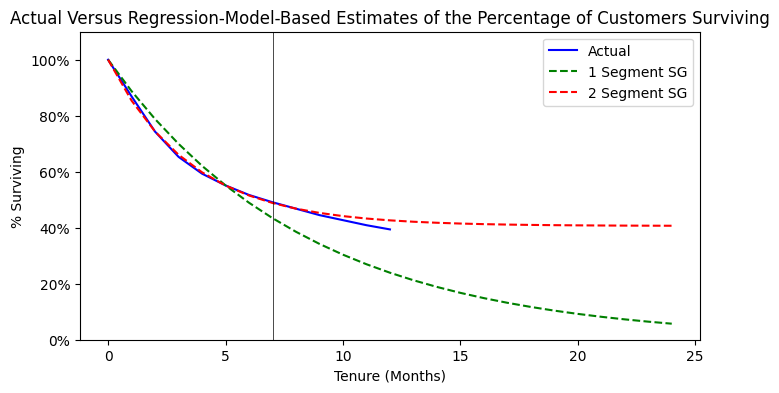

In [26]:
train_marker_x = [7 for _ in np.arange(0,1.2,0.1)]
train_marker_y = [_ for _ in np.arange(0,1.2,0.1)]

retention = alive / alive[0]
x_month = np.arange(0, 25, 1)

# 1 Segment SG
e_retention1 = (1-theta)**x_month

# 2 Segment SG
s1_retention = (1-theta1)**x_month
s2_retention = (1-theta2)**x_month
e_retention2 = s1_retention*pi1 + s2_retention*(1-pi1)

plt.figure(figsize=(8,4), dpi=100)
plt.plot(retention, "b-", label='Actual')
plt.plot(e_retention1, "g--", label='1 Segment SG')
plt.plot(e_retention2, "r--", label='2 Segment SG')
plt.plot(train_marker_x, train_marker_y, "k-", linewidth=0.5)
plt.title('Actual Versus Regression-Model-Based Estimates of the Percentage of Customers Surviving')
plt.xlabel("Tenure (Months)")
plt.ylabel("% Surviving")
plt.ylim(0,1.1)
plt.legend()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

#### Shifted Geometric - Probabilistic distribution, Maximize the likelihood of Observed Churn and Survival

At the end of each contract period, a customer makes the renewal decision by tossing a coin: H → renew, T → don’t renew

| Length of Relationship | |
| ------|----|
| 1 Period | T |
| 2 period | H T |
| 3 Period | H H T |

$$
P(t\space\text{periods}) = 
     \begin{cases}
       P(T) &\quad t=1\\
       P(H) \times P(t-1\space\text{periods}) &\quad t=2,3,\cdots \\
     \end{cases}
$$

**Model**:
- $P(H)=1−\theta$ is constant and unobserved.
- All customers have the same "churn probability" $\theta$.
- Let the random variable $T$ denote the duration of the customer’s relationship with the firm.
- We assume that the random variable $T$ is distributed geometric with parameter $\theta$:
$$P(T=t|\theta)=\theta(1-\theta)^{t-1}, \space t=1,2,3,\cdots$$
$$S(t|\theta)=P(T>t|\theta) = (1-\theta)^{t}, \space t=0,1,2,3,\cdots$$

**Assumptions**:
- The observed data were generated according to the “coin flipping” story of contract renewal, and
- we know $P(T)=\theta$, the probability of the observed pattern of renewals is:
$$[P(T=1|\theta)]^{369}[P(T=2|\theta)]^{163}[P(T=3|\theta)]^{86}[P(T=4|\theta)]^{56}[S(t|\theta)]^{326}=\\
[\theta]^{369}[\theta(1-\theta)]^{163}[\theta(1-\theta)^{2}]^{86}[\theta(1-\theta)^{3}]^{56}[\theta(1-\theta)^{4}]^{326}$$

Suppose we have two candidate coins:
- Coin A: $\theta = 0.2$
- Coin B: $\theta = 0.5$

Which coin is more likely to have generated the observed pattern of renewals across this set of 1000 customers?

| θ | P(data \| θ) | ln[P(data \| θ)]|
|-----|----------------|---------|
| 0.2 | 6.00 x 10^(-647) | -1488.0 |
| 0.5 | 1.40 x 10^(-747) | -1718.7 |

We estimate the model parameters using the method of **maximum likelihood**:
- The likelihood function is defined as the probability of observing the data for a given set of the (unknown) model parameters.
- It is computed using the model and is viewed as a function of the model parameters:
$$L(\text{parameters}| \text{data})= p(\text{data} | \text{parameters}).$$
- For a given dataset, the maximum likelihood estimates of the model parameters are those values that maximize $L( \cdot )$.
- It is typically more convenient to use the **natural logarithm of the likelihood function** — the **log-likelihood** function.

The log-likelihood function is given by:
$$
LL(θ|data)=369 \times ln[P(T=1 |θ)]+\\
163 \times ln[P(T=2 |θ)]+\\
86 \times ln[P(T=3 |θ)]+\\
56 \times ln[P(T=4 |θ)]+\\
326 \times ln[S(4 |θ)]
$$
The maximum value of the log-likelihood function is
$LL = −1451.2$, which occurs at $\theta = 0.272$.

In [27]:
year, alive = np.loadtxt('data/hardie-sample-retention.csv', dtype='object', delimiter=',', unpack=True, skiprows=1) 
year = year.astype(int)
alive = alive.astype(float)
train_year = year[:5]
train_alive = alive[:5]

In [28]:
def log_likelihood(theta):
    n_lost = train_alive[:-1] - train_alive[1:]
    p_churn = theta * (1 - theta)**(train_year - 1)
    ll_churn = np.sum(n_lost * np.log(p_churn[1:]))
    ll_alive = train_alive[-1] * np.log((1-theta)**train_year[-1])
    return -(ll_churn + ll_alive)

guess = 0.5
bnds = [(0.00001,0.99999)]
result = minimize(log_likelihood, guess, bounds=bnds)
theta, ll = result.x, result.fun
print(f'θ = {theta[0]:.3f}')
print(f'log-likelihood = {-ll:0.1f}')

θ = 0.272
log-likelihood = -1451.2


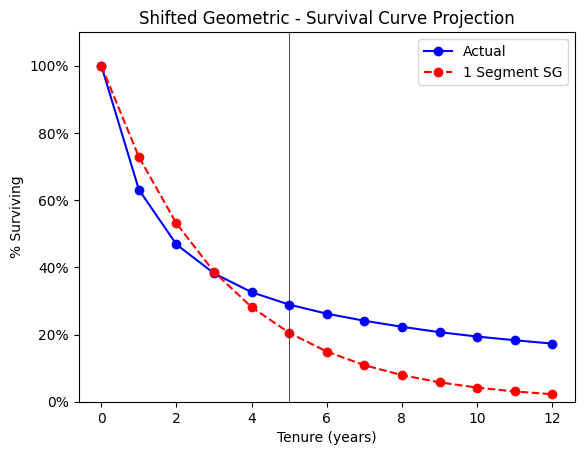

In [29]:
train_marker_x = [5 for _ in np.arange(0,1.2,0.1)]
train_marker_y = [_ for _ in np.arange(0,1.2,0.1)]

retention = alive / alive[0]
e_retention = (1-theta)**year

#plt.figure(figsize=(8,4), dpi=100)
plt.plot(retention, "b-o", label='Actual')
plt.plot(e_retention, "r--o", label='1 Segment SG')
plt.plot(train_marker_x, train_marker_y, "k-", linewidth=0.5)
plt.title('Shifted Geometric - Survival Curve Projection')
plt.xlabel("Tenure (years)")
plt.ylabel("% Surviving")
plt.ylim(0,1.1)
plt.legend()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

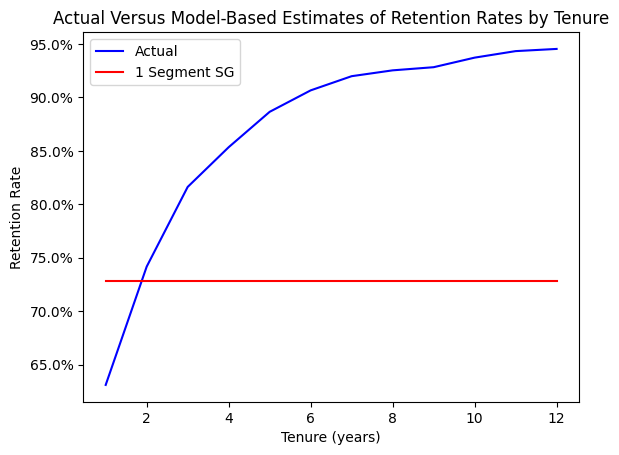

In [30]:
rr = alive[1:] / alive[:-1]
e_alive = alive[0] * e_retention
e_rr = e_alive[1:] / e_alive[:-1]

plt.title("Actual Versus Model-Based Estimates of Retention Rates by Tenure")
plt.plot(year[1:], rr, "b", label='Actual')
plt.plot(year[1:], e_rr, "r", label='1 Segment SG')
plt.xlabel("Tenure (years)")
plt.ylabel("Retention Rate")
plt.legend()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

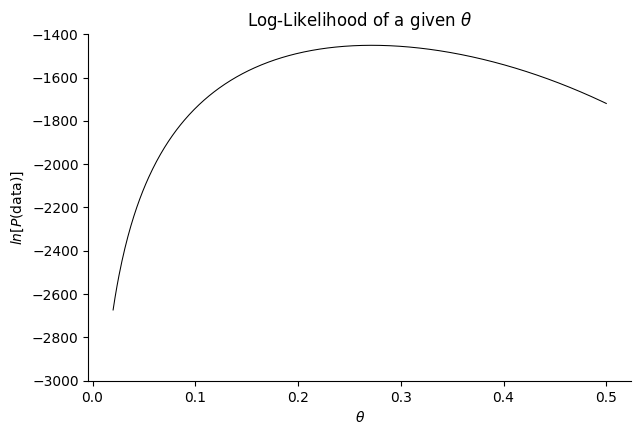

In [31]:
def log_likelihood(theta):
    n_lost = train_alive[:-1] - train_alive[1:]
    p_churn = theta * (1 - theta)**(train_year - 1)
    ll_churn = np.sum(n_lost * np.log(p_churn[1:]))
    ll_alive = train_alive[-1] * np.log((1-theta)**train_year[-1])
    return (ll_churn + ll_alive)

theta_x = np.linspace(0.02, 0.5, 500)
ll_y = np.vectorize(log_likelihood)(theta_x)

plt.figure(figsize=(7,4.5))
plt.title("Log-Likelihood of a given $θ$")
plt.plot(theta_x, ll_y, "k", lw=0.75)
plt.xlabel("$θ$")
plt.ylabel("$ln[P(\\text{data})]$")
plt.ylim(-3000, -1400)

plt.gca().spines[['right', 'top']].set_visible(False)

#### Accommodating Heterogeneity in θ - From Discrete to Continuous

**Visualizing Parameter Estimates**
<div>
<img src="references/visualize-parameter-estimate-1.png" width="350"/>
</div>

- Consider the following story of customer behavior:
  1) At the end of each period, an individual renews his contract with (constant and unobserved) probability $1−θ$.
  2) “Churn probabilities” vary across customers.
- Since we don’t know any given customer’s true value of $θ$, we treat it as a realization of a random variable ($Θ$).
- We need to specify a probability distribution that captures how $θ$ varies across customers (by giving us the probability of each possible value of $θ$).

- Suppose we divide $(0,1)$ into three sub-intervals of equal width: 0.000–0.333, 0.333–0.667, 0.667–1.000
- We allow $θ$ to take on the value of the mid-point of each sub-interval:
$$
Θ = 
     \begin{cases}
       0.167 &\quad \text{with probability}\space P(Θ=0.167)\\
       0.500 &\quad \text{with probability}\space P(Θ=0.500)\\
       0.833 &\quad \text{with probability}\space P(Θ=0.833)\\
     \end{cases}
$$

<div>
<img src="references/visualize-parameter-estimate-2.png" width="400"/>
</div>

$$P(Θ=0.167)+P(Θ=0.500)+P(Θ=0.833)=1$$

- What is the probability that a randomly chosen new customer will cancel their contract at the end of period $t$?
  1) If we knew their $θ$, it would simply be $P(T = t | θ)$.
  2) Since we only know the distribution of $Θ$ across the population, we evaluate $P(T = t | θ)$ for each possible value of $θ$, weighting it by the probability of a randomly chosen new customer having that value of $θ$:
$$P(T = t) = P(T = t |Θ = 0.167) P(Θ = 0.167) \\
+ P(T = t |Θ = 0.500) P(Θ = 0.500) \\
+ P(T = t |Θ = 0.833) P(Θ = 0.833) $$

- The problem with this is that $E(Θ)$ is bounded between 0.167 and 0.833.
- To allow for greater flexibility, suppose we divide $(0, 1)$ into ten sub-intervals of equal width and allow $θ$ to take on the value of the mid-point of each sub-interval:
$$
Θ = 
     \begin{cases}
       0.05 &\quad \text{with probability}\space P(Θ=0.05)\\
       0.15 &\quad \text{with probability}\space P(Θ=0.15)\\
       &\quad \cdots \\
       0.95 &\quad \text{with probability}\space P(Θ=0.95)\\
     \end{cases}
$$

<div>
<img src="references/visualize-parameter-estimate-3.png" width="400"/>
</div>

$$P(Θ = 0.05) + P(Θ = 0.15) + \cdots +P(Θ = 0.95) = 1$$

The probability that a randomly chosen new customer will cancel their contract at the end of period $t$ is:
$$ 
P(T = t) = P(T = t |Θ = 0.05)P(Θ = 0.05) \\
+ P(T = t |Θ = 0.15) P(Θ = 0.15) \\
+ \cdots \\
+ P(T = t |Θ = 0.95) P(Θ = 0.95) 
$$

This ten sub-interval solution is more flexible—$E(Θ)$ is now bounded between 0.05 and 0.95—but is less parsimonious.

### Shifted Beta Geometric (sBG) Model 

The shifted beta geometric model (sBG) is a model that is used to forecast retention/survival of users in contractual settings (think netflix, disney plus, tinder gold, etc). The model is quite simple and posits:
- At the end of each period, a customer flips a coin: “tails” she cancels the contract, “heads” she renews it.
- For each individual, the probability of a coin coming up “tails” does not change over time
- The probability of heads varies across customers. 

The two things we need are the probability density function and the survival function. Mathematically, the probability density and survival function are:
$$P(T=t \mid \alpha, \beta) = \dfrac{B(\alpha+1, \beta+t-1)}{B(\alpha, \beta)}$$
$$S(T=t \mid \alpha, \beta) = \dfrac{B(\alpha, \beta+t)}{B(\alpha, \beta)}$$

Here, $B(\alpha, \beta)$ is the beta function and not the beta distribution.

#### Accommodating Heterogeneity in θ - From Discrete to Continuous

In order to increase flexibility without sacrificing parsimony (unlike increasing the number of discrete segments), we let the number of sub-intervals go to infinity and represent the probabilities in terms of a simple continuous function $g(θ)$ defined over $(0, 1)$:

<div>
<img src="references/beta-distribution.png" width="400"/>
</div>

- The probability of getting a specific value of $θ$ is infinitesimally small.
- Discrete $\rightarrow$ continuous $\Rightarrow\Sigma \rightarrow \int$
- By definition, $P(0 ≤ Θ ≤ 1) = 1 \Leftrightarrow$ area under the curve, $\int_0^1 g(\theta)d\theta$, equals one.
- For a randomly chosen customer,
$$P(T=t)=\int_0^1 P(T=t|\theta)g(\theta)d\theta$$

**The Beta Distribution**

The beta distribution is a flexible (and mathematically convenient) two-parameter distribution bounded between 0 and 1:
$$g(\theta | \gamma,\delta)=\frac{\theta^{\gamma-1}(1-\theta)^{\delta-1}}{B(\gamma,\delta)}\hspace{20mm} \gamma,\delta \gt 0$$
where $B(\gamma,\delta)$ is the beta function.

The mean and variance of the beta distribution are
$$E(Θ)=\frac{\gamma}{\gamma+\delta}$$
$$var(Θ)=\frac{\gamma\delta}{(\gamma+\delta)^{2}(\gamma+\delta+1)}$$

Generally implemented as:
$$f(x; a, b) = \frac{\Gamma(a+b)x^{a-1}(1-x)^{b-1}}{\Gamma(a)\Gamma(b)} \hspace{20mm} 0 \leq x \leq 1, \space a \gt 0, \space b \gt 0$$

**Four General Shapes of the Beta Distribution**

<div>
<img src="references/four-beta-distributions.png" width="400"/>
</div>

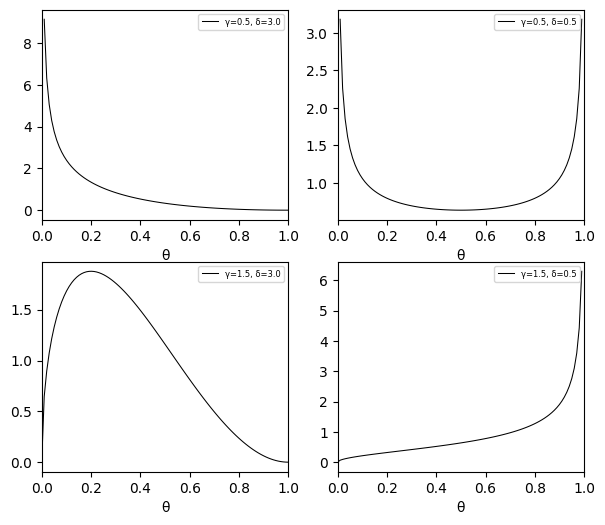

In [41]:
from scipy.stats import beta
gamma, delta = np.array([0.5, 1.5]), np.array([3, 0.5])

# Probability Distribution Plotting:
x = np.linspace(beta.ppf(0, gamma[0], delta[0]), beta.ppf(1, gamma[0], delta[0]), 100)
fig, axes = plt.subplots(2, 2, figsize=(7,6))
for i in range(2):
    for j in range(2):
        ax = axes[i][j]
        ax.plot(x, beta.pdf(x, gamma[i], delta[j]), label=f'γ={gamma[i]}, δ={delta[j]}', color='black', lw=0.75)
        ax.set_xlim(0,1)
        ax.set_xlabel('θ')
        ax.legend(fontsize=6)

If one thinks about how the “coin-flip” probabilities are likely to vary across individuals, there are four principal possibilities, as illustrated in the plots above. If both parameters of the beta distribution ($\alpha$ and $\beta$) are small ($<1$), then the mix of churn probabilities is “U-shaped,” or highly polarized across customers. If both parameters are relatively large ($\alpha,\beta>1$), then the probabilities are fairly homogeneous. Likewise, the distribution of probabilities can be “J-shaped” or “reverse-J-shaped” if the parameters fall within the remaining ranges as shown in the figure. These parameters can offer useful diagnostics to help managers understand the **degree (and nature) of heterogeneity in churn probabilities** across the customer base.

**The Beta Function**

The beta function $B(\gamma,\delta)$ is defined by the integral:
$$B(\gamma,\delta):=\int_0^1 t^{\gamma-1}(1-t)^{\delta-1}dt, \space \gamma,\delta \gt 0$$

and can be expressed in terms of gamma functions:
$$B(\gamma,\delta)=\frac{\Gamma(\gamma)\Gamma(\delta)}{\Gamma(\gamma+\delta)}$$

The gamma function $\Gamma(\gamma)$ is a **generalized factorial**, which has the recursive property $Γ(γ + 1) = γΓ(γ)$. Since $Γ (0) = 1, Γ(n) = (n − 1)!$ for positive integer $n$.

**Developing the Model**

For a randomly chosen individual,
$$
  \begin{aligned}
    P(T=t|\gamma,\delta) &= \int_0^1 P(T=t|\theta)g(\theta|\gamma,\delta)d\theta \\
                   &= \int_0^1 \theta(1-\theta)^{t-1}\frac{\theta^{\gamma-1}(1-\theta)^{\delta-1}}{B(\gamma,\delta)}d\theta \\
                   &= \frac{1}{B(\gamma,\delta)}\int_0^1 \theta^{\gamma}(1-\theta)^{\gamma+t-2}d\theta \\
                   &= \frac{B(\gamma+1,\delta + t - 1)}{B(\gamma, \delta)}
  \end{aligned}
$$

Similarly,
$$
  \begin{aligned}
    S(t|\gamma,\delta) &= \int_0^1 S(t|\theta)g(\theta|\gamma,\delta)d\theta \\
                   &= \int_0^1 \theta(1-\theta)^{t}\frac{\theta^{\gamma-1}(1-\theta)^{\delta-1}}{B(\gamma,\delta)}d\theta \\
                   &= \frac{1}{B(\gamma,\delta)}\int_0^1 \theta^{\gamma-1}(1-\theta)^{\gamma+t-1}d\theta \\
                   &= \frac{B(\gamma,\delta + t)}{B(\gamma, \delta)}
  \end{aligned}
$$

We call this *continuous mixture* model the beta-geometric (BG) distribution.

We can compute BG probabilities using the following forward-recursion formula from $P(T = 1)$:
$$
P(T=t|\gamma,\delta) = 
     \begin{cases}
       \frac{\gamma}{\gamma + \delta} &\quad t = 1\\
       \\
       \frac{\delta + t - 2}{\gamma + \delta + t - 1}\times P(T=t-1) &\quad t=2,3,\cdots\\
     \end{cases}
$$

**Estimating Model Parameters**

Assuming:
1) the observed data were generated according to the heterogeneous “coin flipping” story of contract renewal, and
2) we know $γ$ and $δ$, the probability of the observed pattern of renewals is:
$$[P(T=1|\gamma,\delta)]^{369}[P(T=2|\gamma,\delta)]^{163}[P(T=3|\gamma,\delta)]^{86}[P(T=4|\gamma,\delta)]^{56}[S(4|\gamma,\delta)]^{326}$$

The log-likelihood function is given by:
$$
LL(\gamma, \delta|data)=369 \times ln[P(T=1 |\gamma, \delta)]+\\
163 \times ln[P(T=2 |\gamma, \delta)]+\\
86 \times ln[P(T=3 |\gamma, \delta)]+\\
56 \times ln[P(T=4 |\gamma, \delta)]+\\
326 \times ln[S(4 |\gamma, \delta)]
$$

The maximum value of the log-likelihood function is $LL = −1401.6$, which occurs at $γ = 0.764$ and $δ = 1.296$.

#### Model Implementation

In [121]:
year, alive = np.loadtxt('data/hardie-sample-retention.csv', dtype='object', delimiter=',', unpack=True, skiprows=1) 
year = year.astype(int)
alive = alive.astype(float)
train_year = year[:5]
train_alive = alive[:5]

In [122]:
def log_likelihood(x):
    gamma, delta = x[0], x[1]
    
    p_churn = np.zeros_like(train_alive[1:])
    p_churn[0] = gamma / (gamma + delta) # Define the base probability for t=1
    terms = (delta + train_year[2:] - 2) / (gamma + delta + train_year[2:] - 1) # Define the sequence for t=2,3, ...
    p_churn[1:] = np.cumprod(terms) * p_churn[0] # Calculate cumulative products for probabilities
    
    n_lost = train_alive[:-1] - train_alive[1:]
    ll_churn = np.sum(n_lost * np.log(p_churn))
    ll_alive = train_alive[-1] * np.log(1-np.sum(p_churn))
    return -(ll_churn + ll_alive)

guess = [1, 1]
bnds = [(0, np.inf), (0, np.inf)]
result = minimize(log_likelihood, guess, bounds=bnds)
gamma, delta = result.x[0], result.x[1]
ll = -result.fun
print(f'γ = {gamma:.3f}\nδ = {delta:.3f}\nLog-Likelihood = {ll:,.2f}')

γ = 0.764
δ = 1.296
Log-Likelihood = -1,401.56


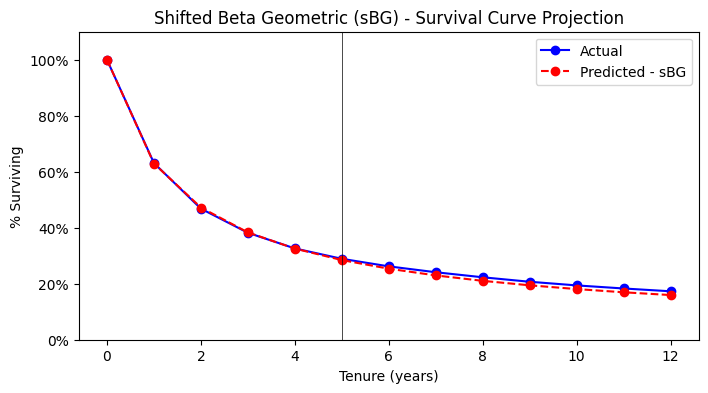

In [123]:
train_marker_x = [5 for _ in np.arange(0,1.2,0.1)]
train_marker_y = [_ for _ in np.arange(0,1.2,0.1)]

retention = alive / alive[0]
p_churn = np.zeros_like(alive)
p_churn[1] = gamma / (gamma + delta)
terms = (delta + year[2:] - 2) / (gamma + delta + year[2:] - 1)
p_churn[2:] = np.cumprod(terms) * p_churn[1]

e_retention = np.ones_like(alive)
for t in range(1, len(alive)):
    e_retention[t] = e_retention[t - 1] - p_churn[t]

plt.figure(figsize=(8,4), dpi=100)
plt.plot(retention, "b-o", label='Actual')
plt.plot(e_retention, "r--o", label='Predicted - sBG')
plt.plot(train_marker_x, train_marker_y, "k-", linewidth=0.5)
plt.title('Shifted Beta Geometric (sBG) - Survival Curve Projection')
plt.xlabel("Tenure (years)")
plt.ylabel("% Surviving")
plt.ylim(0,1.1)
plt.legend()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

**Implied Retention Rates**

- Recall that
$$r(t) = \frac{S(t)}{S(t − 1)}$$

- Given the expression BG survivor function,
$$r(t|\gamma,\delta)=\frac{\delta + t - 1}{\gamma + \delta + t - 1}$$

- An increasing function of time, even though the individual-level retention probability is constant.
- A sorting effect in a heterogeneous population.

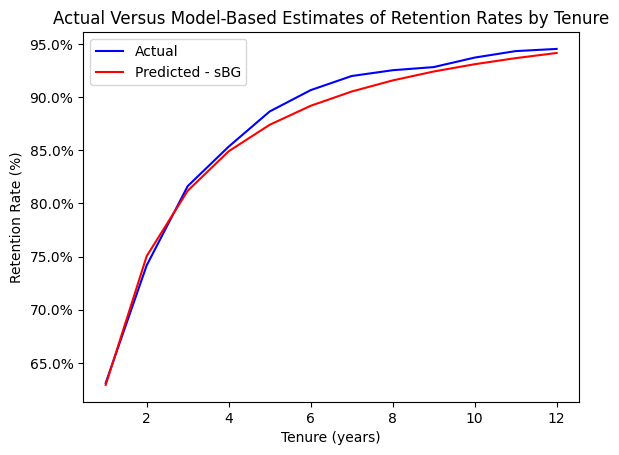

In [124]:
rr = alive[1:] / alive[:-1]
e_alive = alive[0] * e_retention
e_rr = e_alive[1:] / e_alive[:-1]

plt.title("Actual Versus Model-Based Estimates of Retention Rates by Tenure")
plt.plot(year[1:], rr, "b", label='Actual')
plt.plot(year[1:], e_rr, "r", label='Predicted - sBG')
plt.xlabel("Tenure (years)")
plt.ylabel("Retention Rate (%)")
plt.legend()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

##### Estimated Distribution of Churn Probabilities

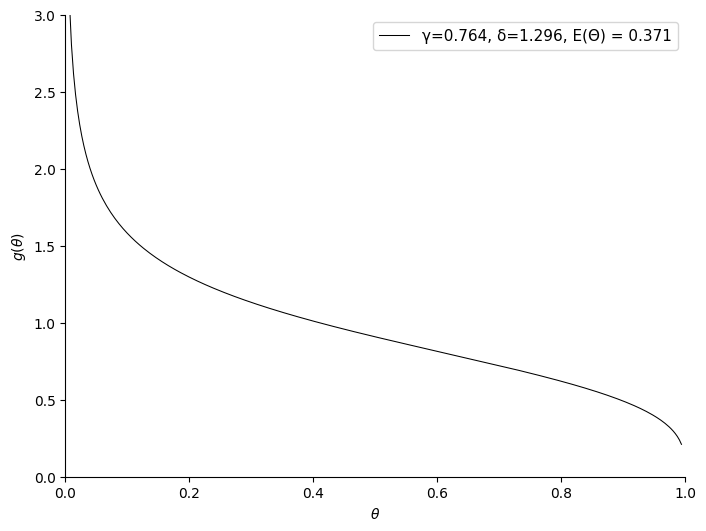

In [96]:
x = np.linspace(beta.ppf(0, gamma, delta), beta.ppf(0.999, gamma, delta), 300)
y = beta.pdf(x, gamma, delta)
plt.figure(figsize=(8,6), dpi=100)
plt.plot(x, y, label=f'γ={gamma:0.3f}, δ={delta:0.3f}, E(Θ) = {gamma/(gamma+delta):.3f}', color='black', lw=0.75)
plt.xlabel('$\\theta$')
plt.ylabel('$g(\\theta)$')
plt.legend(fontsize=11)
plt.ylim((0,3))
plt.xlim((0,1))
plt.gca().spines[['right', 'top']].set_visible(False)

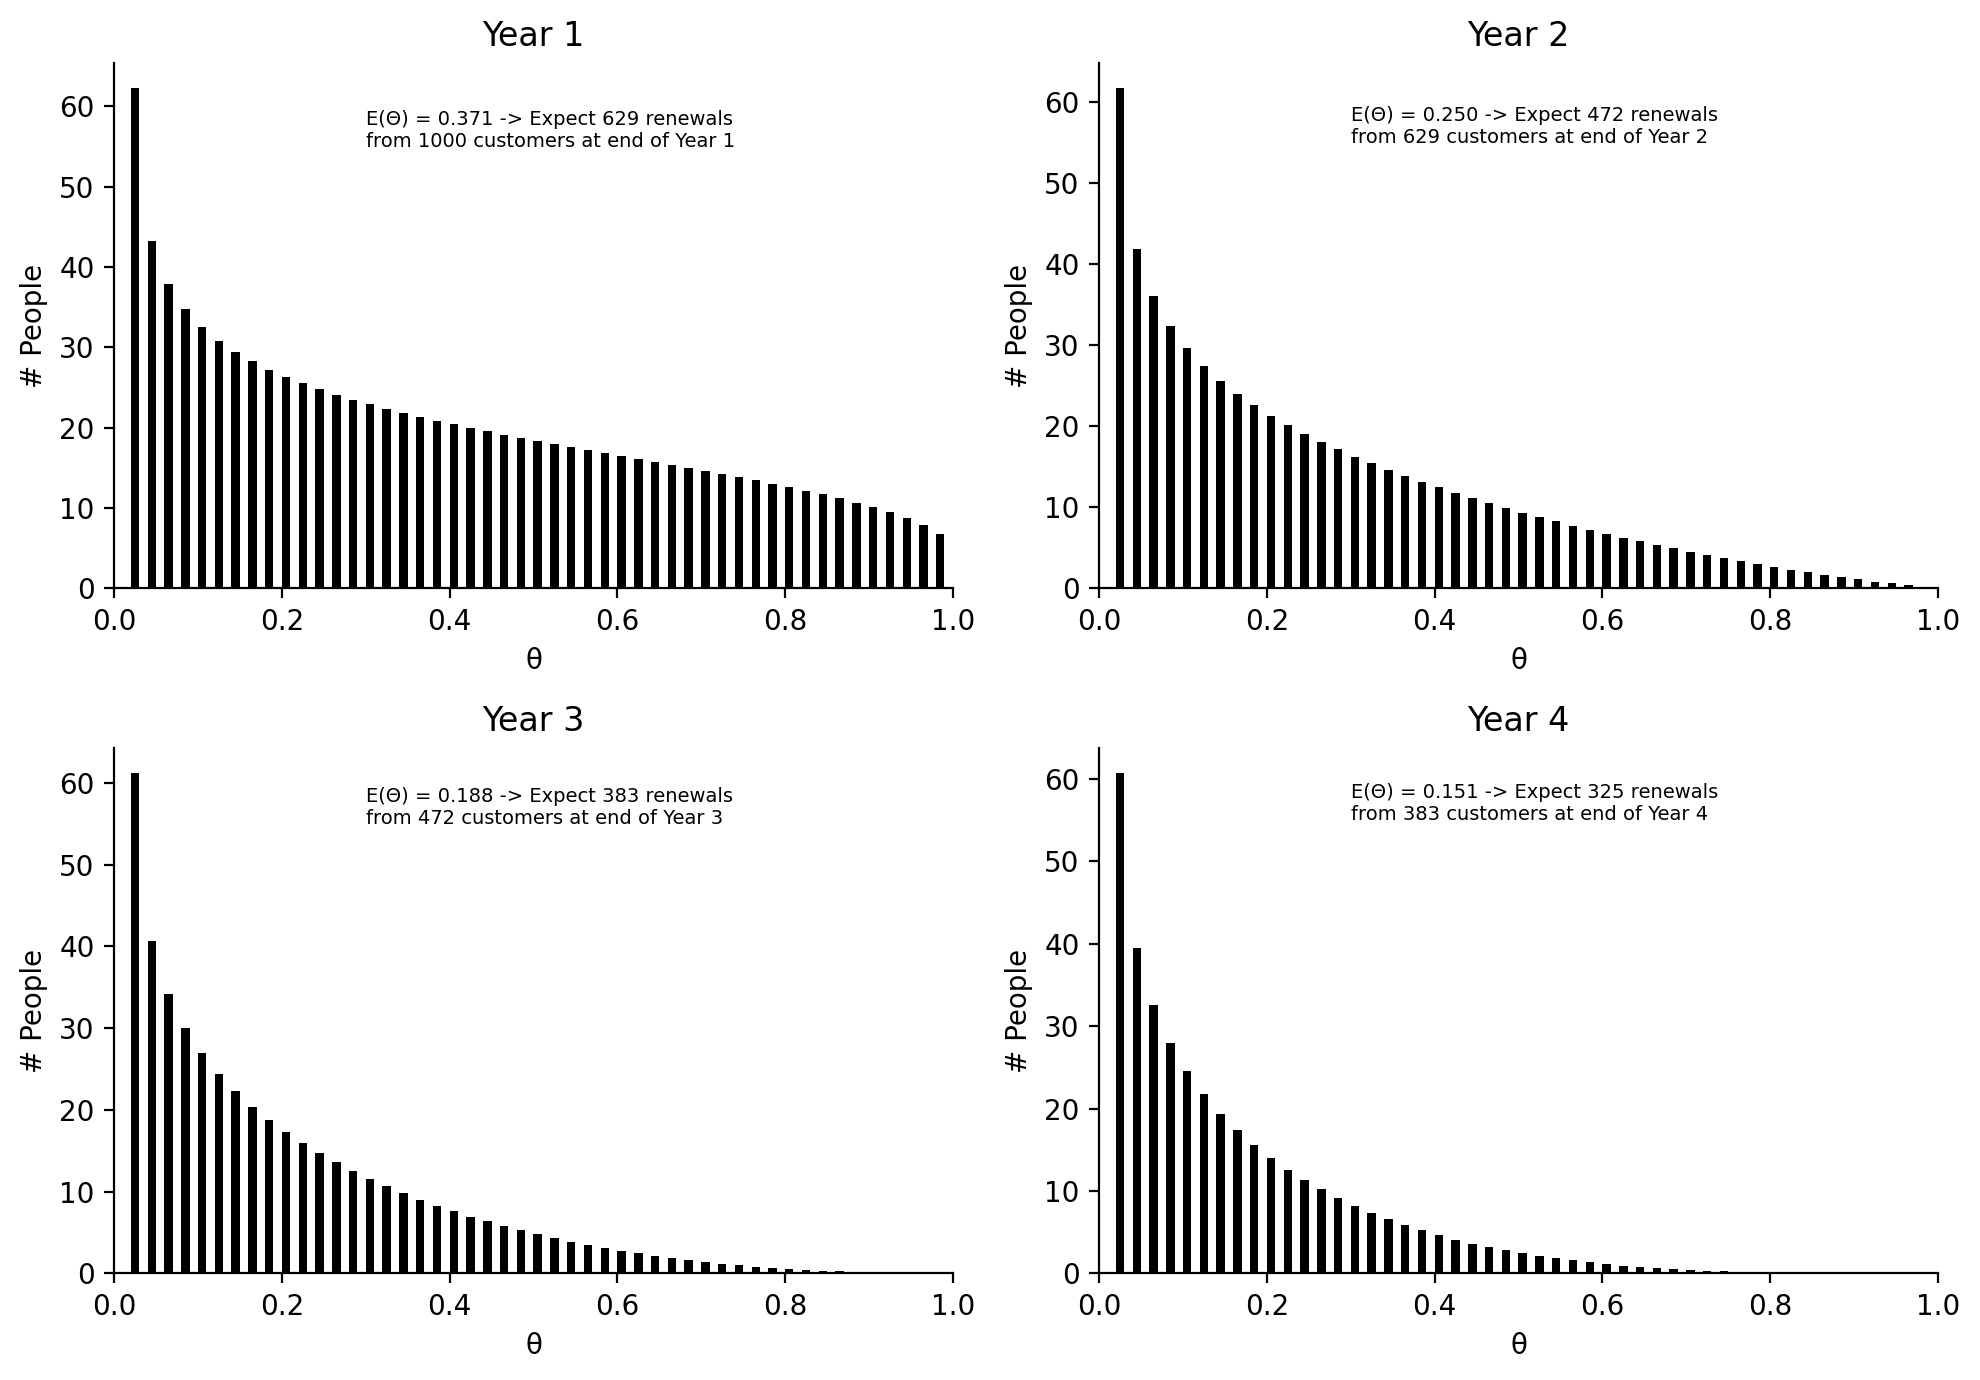

In [171]:
renewals = 4
x = np.linspace(0, 1, 51) # probability intervals (mid-point): compute the number of people holding a coin whose Prob(T) falls in an interval of width 0.02

fig, axes = plt.subplots(2, 2, figsize=(10, 7), dpi=200)
for n in range(renewals):
    # The distribution of Prob(T) or θ across those individuals who have made n renewals is captured by a beta distribution with parameters γ and δ + n. (n = number of renewals)
    # P(Prob(T) <= x)  -> P(θ <= x)
    y = beta.cdf(x, gamma, delta + n) # the probability that the value of Prob(T) (or θ) for a randomly chosen individual is less than or equal to all intervals in x
    alive_t0 = (1 - np.sum(p_churn[:n+1]))*1000
    # P((x−0.02) < Prob(T) <= x) -> P((x-0.02) < θ <= x)
    n_people_alive = np.diff(y) * alive_t0
    # E(Θ) - Expected number of churn next period
    e_churn = gamma / (gamma + delta + n)
    # Expected number of renewal next period
    e_renewals = (1 - e_churn) * alive_t0
    ax = axes[n // 2][n % 2]
    ax.bar(x[1:], n_people_alive, align="edge", width=0.01, color="black")
    ax.set_xlim(0, 1)
    ax.set_xlabel('θ')
    ax.set_ylabel('# People')
    ax.set_title(f'Year {n+1}')
    ax.text(x=0.3, y=55 , s=f'E(Θ) = {e_churn:0.3f} -> Expect {e_renewals:.0f} renewals\nfrom {alive_t0:.0f} customers at end of Year {n+1}', fontsize=7)
    ax.spines[['right', 'top']].set_visible(False)
    
plt.tight_layout()
plt.show()

##### BG LL Function Plots

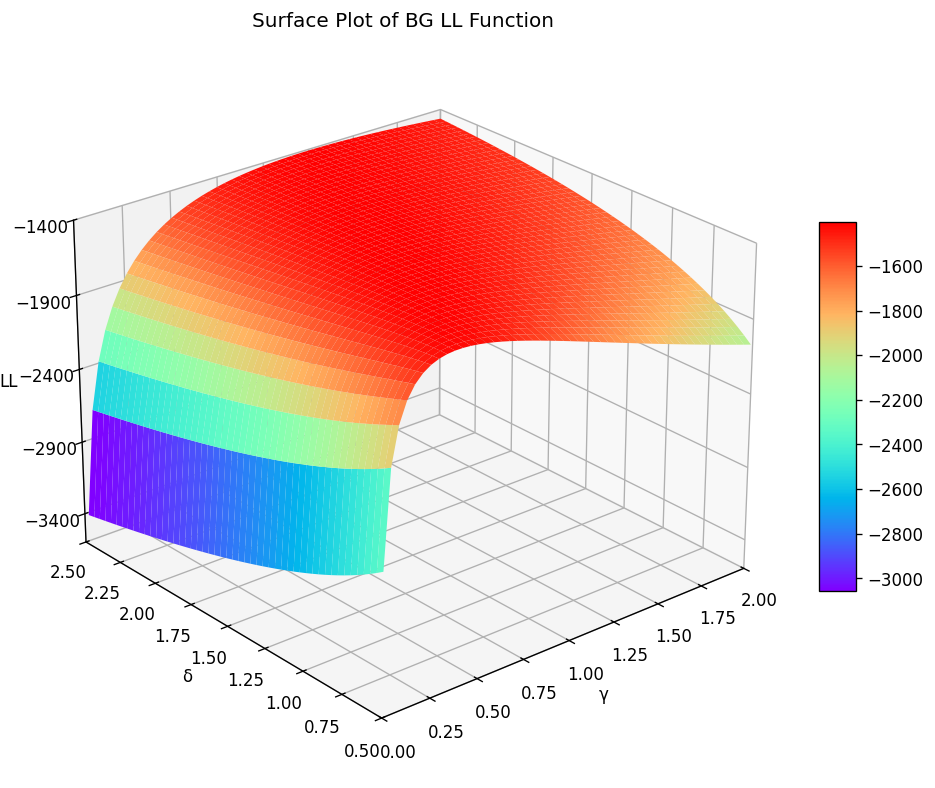

In [38]:
from matplotlib import cm

def log_likelihood(gamma, delta):
    p_churn = np.zeros_like(train_alive[1:])
    p_churn[0] = gamma / (gamma + delta) 
    terms = (delta + train_year[2:] - 2) / (gamma + delta + train_year[2:] - 1) 
    p_churn[1:] = np.cumprod(terms) * p_churn[0] 
    
    n_lost = train_alive[:-1] - train_alive[1:]
    ll_churn = np.sum(n_lost * np.log(p_churn))
    ll_alive = train_alive[-1] * np.log(1-np.sum(p_churn))
    return (ll_churn + ll_alive)

gammas = np.linspace(0.02, 2, 50)
deltas = np.linspace(0.51, 2.5, 50)
delta_grid, gamma_grid = np.meshgrid(deltas, gammas)
lls = np.vectorize(log_likelihood)(gamma_grid, delta_grid)

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={"projection": "3d"}, dpi=120)
surf = ax.plot_surface(X=gamma_grid, Y=delta_grid, Z=lls, cmap=cm.rainbow,
                       linewidth=0.5, antialiased=True)
ax.set_xlabel('γ')
ax.set_ylabel('δ')
ax.set_zlabel('LL')
ax.set_title('Surface Plot of BG LL Function')

ax.view_init(elev=25, azim=230)
ax.set_xlim(0, 2)
ax.set_ylim(0.5, 2.5)
ax.set_zlim(-3600, -1400)
ax.set_zticks([-3400, -2900, -2400, -1900, -1400])

plt.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

[-3419.85728267 -2573.54620259 -2082.11768411 -1796.75926868
 -1631.05983896 -1534.84294286 -1478.97255688 -1446.53022964
 -1427.69190271 -1416.75302774 -1410.40113746 -1406.71277735
 -1404.57105264 -1403.32741467 -1402.60526984]


Text(0.5, 1.0, 'Contour Plot of BG LL Function')

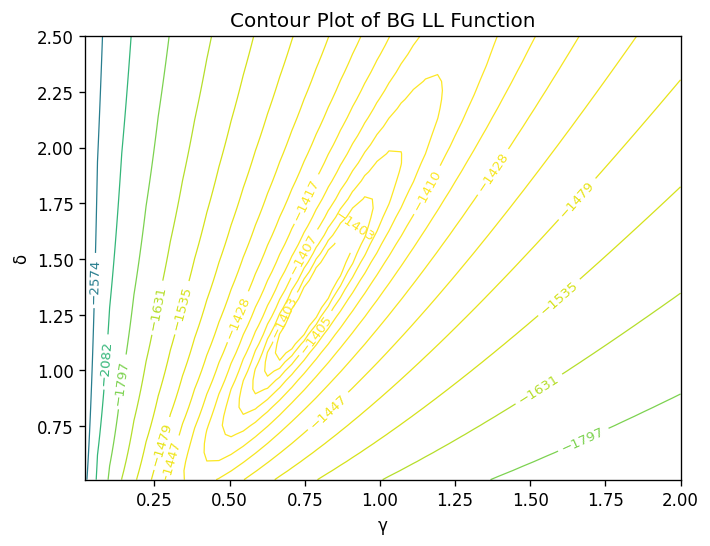

In [39]:
min_ll, max_ll = np.min(lls), np.max(lls)
levels = max_ll - np.geomspace(1, max_ll - min_ll + 1, num=15)
levels = np.sort(levels)
print(levels)

plt.figure(dpi=120)
cs = plt.contour(gamma_grid, delta_grid, lls, levels=levels, linewidths=0.75, color="black")
plt.clabel(cs, fontsize=8)
plt.xlabel('γ')
plt.ylabel('δ')
plt.title('Contour Plot of BG LL Function')

#### Conclusion

- The concept of **duration-time** data, with a specific focus on **single-event discrete-time** data.
- The idea of building a “probability model” to characterize the observed behavior of interest.
- The method of **maximum-likelihood** as a means of estimating model parameters.
- The **beta-geometric (BG) distribution** as a model of contract renewal behavior.
- Retention rate “dynamics.”